# Student Depression Logistc Regression

## Table of Contents

- [Student Depression](#student-depression)
  - [Table of Contents](#table-of-contents)
- [Functions](#functions)
- [Classes](#classes)
- [Load Data](#load-data)
- [Stratified Shuffle Split](#stratified-shuffle-split)
- [Encode Data](#encode-data)
- [Data Preprocessing and Cleaning](#data-preprocessing-and-cleaning)
- [Data Pipeline](#data-pipeline)
- [Logistic Regression](#logistic-regression)
  - [Grid Search](#grid-search)
  - [Overfitting and Underfitting Visualization](#overfitting-and-underfitting-visualization)
  - [Confusion Matrix](#confusion-matrix)
  - [Feature Importance Coefficients in Logistic Regression](#feature-importance-coefficients-in-logistic-regression)

# Functions

In [27]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Visualization Functions
def plot_box_and_histogram(dataframe, column_name, bins=10):
    column_data = dataframe[column_name]
    mean_val = column_data.mean()
    median_val = column_data.median()
    mode_val = column_data.mode()[0]
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)

    fig, ax = plt.subplots(2, 1, figsize=(6, 5))
    sns.boxplot(x=column_data, ax=ax[0], color='skyblue')
    ax[0].set_title(f'Box Plot for {column_name}')
    ax[0].set_xlabel(column_name)

    ax[1].hist(column_data, bins=bins, edgecolor='black', alpha=0.7)
    ax[1].set_title(f'Histogram for {column_name}')
    ax[1].axvline(mean_val, color='purple', linestyle='--', label=f'Mean: {mean_val:.2f}')
    ax[1].axvline(median_val, color='magenta', linestyle='--', label=f'Median: {median_val:.2f}')
    ax[1].axvline(mode_val, color='red', linestyle='-', label=f'Mode: {mode_val:.2f}')
    ax[1].legend()
    plt.tight_layout()
    plt.show()

In [28]:
def plot_categorical_bar_chart(data, column, mapping_dict):
    import matplotlib.pyplot as plt

    # Check if the column exists in the data
    if column not in data.columns:
        raise ValueError(f"Column '{column}' not found in the dataset.")

    # Reverse the mapping dictionary
    reverse_mapping_dict = {v: k for k, v in mapping_dict.items()}

    # Map the column using the reversed mapping dictionary
    mapped_category = data[column].map(reverse_mapping_dict)

    # Handle unmapped values
    if mapped_category.isnull().any():
        raise ValueError("Some values in the column do not have corresponding keys in the mapping dictionary.")

    # Count the occurrences of each category
    category_counts = mapped_category.value_counts()

    # Plot the bar chart
    plt.figure(figsize=(6, 4))
    category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title(f"Bar Chart for {column}", fontsize=16)
    plt.xlabel("Category", fontsize=14)
    plt.ylabel("Count", fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.tight_layout()
    plt.show()


In [29]:
from sklearn.metrics import precision_score, recall_score, f1_score

def evaluate_model(y_train, predictions, average='binary'):
    precision = precision_score(y_train, predictions, average=average)
    recall = recall_score(y_train, predictions, average=average)
    f1 = f1_score(y_train, predictions, average=average)

    # Print results
    print(f"Precision: {precision:.8f}")
    print(f"Recall:    {recall:.8f}")
    print(f"F1 Score:  {f1:.8f}")

In [30]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import roc_curve, roc_auc_score

def evaluate_model_cross_val(model, model_name, X, y):
    # Compute cross-validated precision
    precision = cross_val_score(model, X, y, cv=10, scoring='precision')
    
    # Compute cross-validated recall
    recall = cross_val_score(model, X, y, cv=10, scoring='recall')
    
    # Compute cross-validated F1 score
    f1 = cross_val_score(model, X, y, cv=10, scoring='f1')
    
    # Compute cross-validated ROC AUC score
    roc_auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
    
    # Print the results
    print(f"Precision: {precision.mean():.8f}")
    print(f"Recall:    {recall.mean():.8f}")
    print(f"F1 Score:  {f1.mean():.8f}")
    print(f"ROC AUC:   {roc_auc.mean():.8f}")

    # Get cross-validated predicted probabilities
    y_prob = cross_val_predict(model, X, y, cv=10, method='predict_proba')[:, 1]

    # Compute ROC curve
    fpr, tpr, _ = roc_curve(y, y_prob)
    auc = roc_auc_score(y, y_prob)

    # Plot ROC Curve
    plt.figure(figsize=(4, 3))
    plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.8f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier baseline
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.title("Cross-Validated ROC Curve")
    plt.legend()
    plt.show()
    
    # Return results as a DataFrame
    return pd.DataFrame([{
        "Model": model_name,
        "Precision": precision.mean(),
        "Recall": recall.mean(),
        "F1 Score": f1.mean(),
        "ROC AUC": roc_auc.mean()
    }])

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot the heatmap
def plot_correlation_heatmap(df, method, figsize=(6, 5)):
    # Compute correlation matrix
    corr_matrix = df.corr(method=method)
    
    title = f"{method.capitalize()} Correlation Heatmap"

    # Plot heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', square=True, cbar_kws={"shrink": 0.8})
    plt.title(title, fontsize=10)
    plt.show()

In [32]:
def plot_feature_correlation(df, target, method, figsize=(6, 4), color='blue'):
    # Ensure target column exists
    if target not in df.columns:
        raise ValueError(f"Column '{target}' not found in DataFrame.")

    # Compute correlation with the target variable
    correlation_with_target = df.corr(method=method)[target].drop(target)

    title = f"{method.capitalize()} Correlation with {target.capitalize()}"

    # Plot bar chart
    plt.figure(figsize=figsize)
    correlation_with_target.sort_values().plot(kind='bar', color=color)
    plt.title(title, fontsize=14)
    plt.ylabel("Correlation Coefficient")
    plt.xlabel("Features")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

In [33]:
from scipy.stats import pearsonr, spearmanr, kendalltau

def plot_scatter_correlation(df, x_col, y_col, method, figsize=(4, 3), color='red', alpha=0.3):
    # Ensure the columns exist
    if x_col not in df.columns or y_col not in df.columns:
        raise ValueError(f"Columns '{x_col}' or '{y_col}' not found in DataFrame.")
    
        # Compute correlation coefficient
    if method == 'pearson':
        corr, _ = pearsonr(df[x_col], df[y_col])
    elif method == 'spearman':
        corr, _ = spearmanr(df[x_col], df[y_col])
    elif method == 'kendall':
        corr, _ = kendalltau(df[x_col], df[y_col])
    else:
        raise ValueError("Method must be 'pearson', 'spearman', or 'kendall'.")

    # Plot scatter plot with regression line
    plt.figure(figsize=figsize)
    sns.regplot(x=df[x_col], y=df[y_col], scatter_kws={'alpha': alpha}, line_kws={'color': color})

    # Add Titles and Labels
    plt.title(f"{method.capitalize()} Correlation: {corr:.2f}", fontsize=10)
    plt.xlabel(x_col.capitalize())
    plt.ylabel(y_col.capitalize())
    plt.show()

# Classes

In [34]:
import warnings
import pandas as pd
from sklearn.base import BaseEstimator, TransformerMixin

# Suppress FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('future.no_silent_downcasting', True)

class CustomEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, mapping):
        self.mapping = mapping

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if not isinstance(X, (pd.Series, pd.DataFrame)):
            raise ValueError("Input must be a pandas Series or DataFrame.")
        
        # If input is a Series, work directly
        if isinstance(X, pd.Series):
            X_transformed = X.replace(self.mapping)
            X_transformed = X_transformed.infer_objects(copy=False)  # Explicit call
            return X_transformed.values.reshape(-1, 1)
        
        # If input is a DataFrame, assume only one column is passed for transformation
        if X.shape[1] != 1:
            raise ValueError("DataFrame input must have exactly one column for this transformer.")
        
        column_name = X.columns[0]
        X_transformed = X[column_name].replace(self.mapping)
        X_transformed = X_transformed.infer_objects(copy=False)  # Explicit call
        return X_transformed.values.reshape(-1, 1)


In [35]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np
import pandas as pd

class AgeBinner(BaseEstimator, TransformerMixin):
    def __init__(self, bins=None, labels=None):
        self.bins = bins if bins else [0, 22, 26, 30, 40, 60]
        self.labels = labels if labels else ["Teenager (18-21)", "Young Adult (22-25)", 
                                             "Early Career (26-29)", "Mid-Career (30-39)", "Established (40+)"]

    def fit(self, X, y=None):
        return self  # No fitting necessary

    def transform(self, X):
        # Ensure X is a 1D array
        if isinstance(X, np.ndarray) and X.ndim > 1:
            X = X[:, 0]

        # Apply binning using pd.cut
        binned_ages = pd.cut(X, bins=self.bins, labels=self.labels, right=False)

        # Convert to a NumPy array and reshape to 2D for OneHotEncoder
        return np.array(binned_ages).reshape(-1, 1)  


# Load Data

In [36]:
file_path = r"./Student Depression Dataset.csv"
dataframe = pd.read_csv(file_path)

# Define a dictionary to map old column names to new, shorter, lowercase names
column_mapping = {
    'id': 'id',
    'Gender': 'gender',
    'Age': 'age',
    'City': 'city',
    'Profession': 'prof',
    'Academic Pressure': 'acad_press',
    'Work Pressure': 'work_press',
    'CGPA': 'cgpa',
    'Study Satisfaction': 'study_sat',
    'Job Satisfaction': 'job_sat',
    'Sleep Duration': 'sleep_dur',
    'Dietary Habits': 'diet_habits',
    'Degree': 'degree',
    'Have you ever had suicidal thoughts ?': 'suicidal_thoughts',
    'Work/Study Hours': 'work_hours',
    'Financial Stress': 'fin_stress',
    'Family History of Mental Illness': 'fam_hist_mental',
    'Depression': 'depression'
}
# Remove extra spaces from all columns in the DataFrame
dataframe = dataframe.applymap(lambda x: x.strip() if isinstance(x, str) else x)

dataframe.columns = dataframe.columns.str.strip()  # Strips leading and trailing
initial_size = dataframe.shape[0]
dataframe.rename(columns=column_mapping, inplace=True)
dataframe.head(4)

,id,gender,age,city,prof,acad_press,work_press,cgpa,study_sat,job_sat,sleep_dur,diet_habits,degree,suicidal_thoughts,work_hours,fin_stress,fam_hist_mental,depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1


# Stratified Shuffle Split

In [37]:
from sklearn.model_selection import StratifiedShuffleSplit

# Define the target variable
target_column = 'depression'

# Create a stratification column combining categorical features (excluding the target)
strat_columns = ['gender', 'suicidal_thoughts', 'fam_hist_mental']
dataframe['stratify_column'] = dataframe[strat_columns].astype(str).agg('_'.join, axis=1)

# Stratified Shuffle Split
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(dataframe, dataframe['stratify_column']):
    train_set = dataframe.iloc[train_index].copy()
    test_set = dataframe.iloc[test_index].copy()

# Drop the stratification column
train_set.drop(columns=['stratify_column'], inplace=True)
test_set.drop(columns=['stratify_column'], inplace=True)

# Separate features (X) and target (y)
X_train = train_set.drop(columns=[target_column])  # All columns except target
y_train = train_set[target_column]  # Only the target column

X_test = test_set.drop(columns=[target_column])
y_test = test_set[target_column]

dep = train_set.copy()

# Encode Data

## Encode Gender

In [38]:
gender_mapping = {
    'Male': 2,
    'Female': 3
}

dep['gender'] = dep['gender'].replace(gender_mapping)
dep['gender'].value_counts()

gender
2    12437
3     9883
Name: count, dtype: int64

## Ecnode Sleep

In [39]:
dep['sleep_dur'].value_counts()

sleep_dur
Less than 5 hours    6628
7-8 hours            5935
5-6 hours            4909
More than 8 hours    4831
Others                 17
Name: count, dtype: int64

In [40]:
sleep_dur_mapping = {
    'Less than 5 hours': 2,
    '5-6 hours': 3,
    '7-8 hours': 4,
    'More than 8 hours': 5,
    'Others': 6
}

dep['sleep_dur'] = dep['sleep_dur'].replace(sleep_dur_mapping)
dep['sleep_dur'].value_counts()

sleep_dur
2    6628
4    5935
3    4909
5    4831
6      17
Name: count, dtype: int64

## Encode Dietary Habits

In [41]:
dep['diet_habits'].value_counts()

diet_habits
Unhealthy    8278
Moderate     7957
Healthy      6075
Others         10
Name: count, dtype: int64

In [42]:
diet_habits_mapping = {
    'Unhealthy' : 2,
    'Moderate' : 3,
    'Healthy' : 4,
    'Others': 5
}

dep['diet_habits'] = dep['diet_habits'].replace(diet_habits_mapping)
dep = dep.drop(dep[dep['diet_habits'] == 'Others'].index) 
dep['diet_habits'].value_counts()

diet_habits
2    8278
3    7957
4    6075
5      10
Name: count, dtype: int64

## Encode Suicidal Thoughts

In [43]:
suicidal_thoughts_mapping = {
    'Yes' : 1,
    'No' : 0
}

dep['suicidal_thoughts'] = dep['suicidal_thoughts'].replace(suicidal_thoughts_mapping)
dep = dep.drop(dep[dep['suicidal_thoughts'] == 'Others'].index) # Remove all non students 
dep['suicidal_thoughts'].value_counts()

suicidal_thoughts
1    14125
0     8195
Name: count, dtype: int64

## Encode Financial Stress

In [44]:
dep['fin_stress'] = pd.to_numeric(dep['fin_stress'], errors='coerce')  # Convert to numeric, setting invalid parsing to NaN
dep['fin_stress'] = dep['fin_stress'].fillna(0).astype(int)  # Fill NaN with 0 and convert to int

## Encode Family History of Mental Illness

In [45]:
fam_hist_mental_mapping = {
    'Yes' : 1,
    'No' : 0
}

dep['fam_hist_mental'] = dep['fam_hist_mental'].replace(fam_hist_mental_mapping)
dep = dep.drop(dep[dep['fam_hist_mental'] == 'Others'].index) # Remove all non students 
dep['fam_hist_mental'].value_counts()

fam_hist_mental
0    11518
1    10802
Name: count, dtype: int64

In [46]:
depression_mapping = {
    'Yes' : 1,
    'No' : 0
}

# Data prepossessing and cleaning

## Remove all non students

In [47]:
dep['prof'].value_counts()

prof
Student                   22296
Architect                     7
Teacher                       4
Digital Marketer              3
Pharmacist                    2
Chef                          2
Entrepreneur                  1
Content Writer                1
Doctor                        1
Educational Consultant        1
Civil Engineer                1
UX/UI Designer                1
Name: count, dtype: int64

In [48]:
dep.loc[dep['prof'] != 'Student', 'prof'] = None
dep['prof'].value_counts()

prof
Student    22296
Name: count, dtype: int64

## Drop city, degree, prof and job satisfaction

In [49]:
dep.drop(columns=['city', 'degree', 'prof','job_sat'], inplace=True)
dep.head()

,id,gender,age,acad_press,work_press,cgpa,study_sat,sleep_dur,diet_habits,suicidal_thoughts,work_hours,fin_stress,fam_hist_mental,depression
12887,65253,2,34.0,3.0,0.0,6.78,5.0,5,3,0,3.0,3,1,0
15949,80615,3,26.0,5.0,0.0,6.59,2.0,5,2,1,4.0,5,0,1
13506,68473,2,20.0,3.0,0.0,9.90,4.0,3,3,1,8.0,5,0,1
20177,102163,2,25.0,5.0,0.0,6.44,1.0,3,2,1,10.0,5,0,1
26728,134874,2,32.0,3.0,0.0,5.16,1.0,5,2,1,0.0,4,1,0


# Data Pipeline

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Numerical Features (excluding 'age' since it will be binned)
numerical_features = ['acad_press', 'cgpa', 'study_sat']

# Age Feature (separate handling)
age_feature = ['age']

# Categorical Features (excluding 'sleep_dur' and 'diet_habits' since they will be One-Hot Encoded separately)
categorical_features = ['gender', 'suicidal_thoughts', 'fam_hist_mental', 'sleep_dur', 'diet_habits']

# Pipeline for Age Binning + One-Hot Encoding
age_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),            # Handle missing values
    ('binner', AgeBinner()),                                # Convert age to bins
    ('encoder', OneHotEncoder(handle_unknown='ignore'))     # One-hot encode age bins
])

# Pipeline for Numerical Features
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),    # Handle missing values
    ('scaler', MinMaxScaler())                      # Standardize numerical data
])

# Pipeline for One-Hot Encoding of 'sleep_dur' and 'diet_habits'
one_hot_pipeline = ColumnTransformer([
    ('gender', OneHotEncoder(handle_unknown='ignore'), ['gender']),
    ('suicidal_thoughts', OneHotEncoder(handle_unknown='ignore'), ['suicidal_thoughts']),
    ('fam_hist_mental', OneHotEncoder(handle_unknown='ignore'), ['fam_hist_mental']),
    ('sleep_dur', OneHotEncoder(handle_unknown='ignore'), ['sleep_dur']),
    ('diet_habits', OneHotEncoder(handle_unknown='ignore'), ['diet_habits'])
])

# Combine into Full Pipeline
full_pipeline = ColumnTransformer([
    ('age', age_pipeline, age_feature),                     # Age is now categorical and One-Hot Encoded
    ('num', numerical_pipeline, numerical_features),        # Numerical processing
    ('one_hot', one_hot_pipeline, categorical_features)     # One-Hot Encoding
])


In [51]:
# Apply the pipeline to the training and testing sets
X_train_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

# Logistic Regression

## Grid search

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, fbeta_score

# Create a custom scorer for F2-score
f2_scorer = make_scorer(fbeta_score, beta=2)

# Define solver-penalty-multiclass compatibility
param_grid = [
    {'C': [0.001, 0.01, 0.1, 1, 10], 
     'penalty': ['l2', None], 
     'solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'multinomial'], 
     'multi_class': ['multinomial'], 
     'max_iter': [40, 50, 60], 
     'class_weight': [None, 'balanced']},

    {'C': [0.001, 0.01, 0.1, 1, 10], 
     'penalty': ['l1', 'l2'], 
     'solver': ['liblinear'], 
     'multi_class': ['ovr'],  # liblinear does not support multinomial
     'max_iter': [40, 50, 60], 
     'class_weight': [None, 'balanced']},

    {'C': [0.001, 0.01, 0.1, 1, 10], 
     'penalty': ['elasticnet', 'l1', 'l2', None], 
     'solver': ['saga'], 
     'multi_class': ['multinomial'], 
     'l1_ratio': [0.1, 0.5, 0.9],  # Only used for ElasticNet
     'max_iter': [40, 50, 60], 
     'class_weight': [None, 'balanced']}
]

# Initialize logistic regression
log_reg = LogisticRegression(random_state=42)

# Set up Grid Search with F2-score as the metric and 10-fold CV
grid_search = GridSearchCV(
    log_reg,
    param_grid,
    cv=10,  # 10-fold cross-validation
    scoring=f2_scorer,  # Custom F2-score metric
    n_jobs=-1,  # Use all CPU cores for speed
    verbose=0
)

# Fit the model
grid_search.fit(X_train_prepared, y_train)

In [53]:
# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)


Best Parameters: {'C': 0.01, 'class_weight': None, 'max_iter': 40, 'multi_class': 'ovr', 'penalty': 'l1', 'solver': 'liblinear'}


## Overfitting and Underfitting Visualization


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import cross_val_score

# Create a custom scorer for F2-score
f2_scorer = make_scorer(fbeta_score, beta=2)

# Define different values of C (inverse of regularization strength)
C_values = np.logspace(-2, 3, 10)  

# Lists to store mean F2-scores
f2_train_scores = []
f2_test_scores = []

# Perform cross-validation for different C values
for C in C_values:
    log_reg = LogisticRegression(C=C, solver='liblinear', penalty='l1', multi_class='ovr', n_jobs=-1, verbose=0)  # 'liblinear' supports small datasets

    # Cross-validation for training and test sets
    f2_train = cross_val_score(log_reg, X_train_prepared, y_train, cv=10, scoring=f2_scorer, n_jobs=-1, verbose=0).mean()
    f2_test = cross_val_score(log_reg, X_test_prepared, y_test, cv=10, scoring=f2_scorer, n_jobs=-1, verbose=0).mean()

    # Store results
    f2_train_scores.append(f2_train)
    f2_test_scores.append(f2_test)

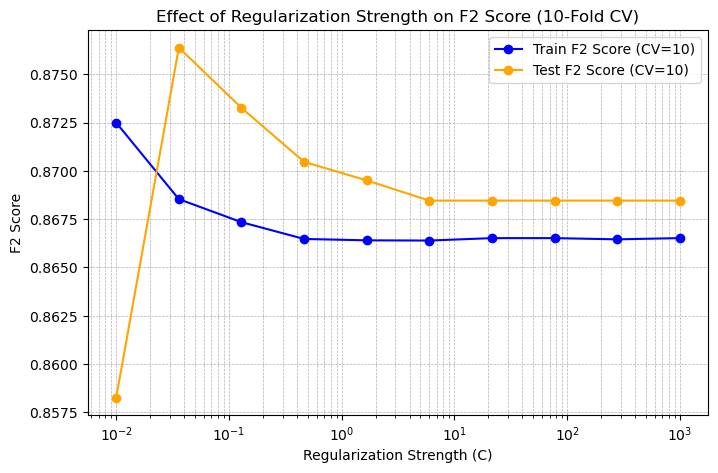

Train & Test F2 Score diifernce:
Train set F1 scrore: 0.86651923
Test set F1 scrore: 0.86846087
Absolute Difference: -0.00194164
Percentage Difference: -0.22%


In [55]:
# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(C_values, f2_train_scores, marker='o', color='blue', label='Train F2 Score (CV=10)')
plt.plot(C_values, f2_test_scores, marker='o', color='orange', label='Test F2 Score (CV=10)')

# Log scale for x-axis
plt.xscale("log")

# Labels and Title
plt.xlabel("Regularization Strength (C)")
plt.ylabel("F2 Score")
plt.title("Effect of Regularization Strength on F2 Score (10-Fold CV)")

# Grid and Legend
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.legend()

# Show the plot
plt.show()

# Find index where C = 1000
c_index = np.where(C_values == 1000)[0][0]

# Retrieve train and test F2-score at C = 1000
train_f2_at_1000 = f2_train_scores[c_index]
test_f2_at_1000 = f2_test_scores[c_index]

# Compute absolute and percentage difference
absolute_difference = train_f2_at_1000 - test_f2_at_1000
percentage_difference = (absolute_difference / train_f2_at_1000) * 100

# Print the results

print(f"Train & Test F2 Score diifernce:")
print(f"Train set F1 scrore: {train_f2_at_1000:.8f}")
print(f"Test set F1 scrore: {test_f2_at_1000:.8f}")
print(f"Absolute Difference: {absolute_difference:.8f}")
print(f"Percentage Difference: {percentage_difference:.2f}%")

## Confusion Matrix

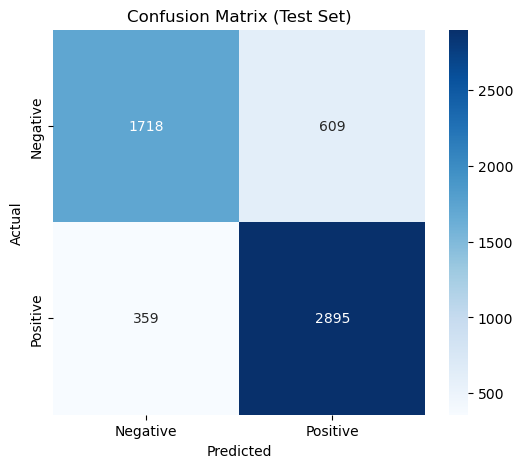

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict on the test set
y_test_pred = best_model.predict(X_test_prepared)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Test Set)")
plt.show()


## Feature Importance Coefficients in Logistic Regression

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Extract the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Get feature names (if X_train_prepared is a DataFrame)
feature_names = X_train_prepared.columns if isinstance(X_train_prepared, pd.DataFrame) else [f"Feature_{i}" for i in range(X_train_prepared.shape[1])]

# Get coefficients
coefficients = best_model.coef_.flatten()

# Create a DataFrame for visualization
coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})

# Sort by absolute coefficient value
coef_df = coef_df.reindex(coef_df["Coefficient"].abs().sort_values(ascending=False).index)

age_features = ["18-21", "22-25", "26-29", "30-39", "40+"]  # Adjust as needed

one_hot_encoder = OneHotEncoder(handle_unknown='ignore', drop=None)
one_hot_encoder.fit(X_train[categorical_features])  # Replace `df` with your actual DataFrame

one_hot_feature_names = one_hot_encoder.get_feature_names_out(categorical_features)

transformed_feature_names = (
    age_features +  # Adjust based on AgeBinner bins
    numerical_features +  # ['acad_press', 'cgpa', 'study_sat']
    list(one_hot_feature_names)  # One-hot encoded feature names
)

feature_importance = pd.DataFrame({
    'Feature': transformed_feature_names,
    'Coefficient': best_model.coef_[0]  # Assuming binary classification
})

feature_importance = feature_importance.sort_values(by='Coefficient', key=abs, ascending=False)



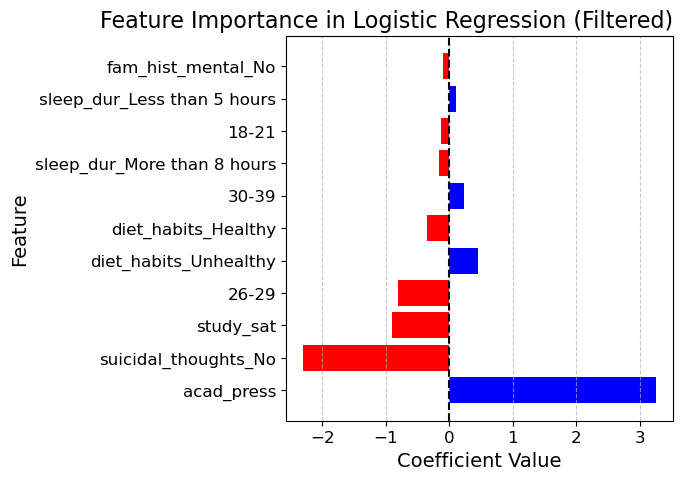

In [58]:
import matplotlib.pyplot as plt


# Filter out features with coefficients equal to 0
filtered_feature_importance = feature_importance[abs(feature_importance['Coefficient']) != 0]

plt.figure(figsize=(5, 5))  # Adjust figure size for readability

# Define colors: Red for negative, Blue for positive coefficients
colors = ['red' if coef < 0 else 'blue' for coef in filtered_feature_importance['Coefficient']]

# Plot the filtered feature importance
plt.barh(filtered_feature_importance['Feature'], filtered_feature_importance['Coefficient'], color=colors)
plt.axvline(x=0, color='black', linestyle='dashed')

# Improve readability
plt.xlabel('Coefficient Value', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.title('Feature Importance in Logistic Regression (Filtered)', fontsize=16, loc='right')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()



In [59]:
feature_importance_sorted = filtered_feature_importance.sort_values(by="Coefficient", ascending=False)
display(feature_importance_sorted.head(50))


,Feature,Coefficient
5,acad_press,3.247717
22,diet_habits_Unhealthy,0.447320
3,30-39,0.235937
16,sleep_dur_Less than 5 hours,0.111857
12,fam_hist_mental_No,-0.097528
0,18-21,-0.131894
17,sleep_dur_More than 8 hours,-0.166337
19,diet_habits_Healthy,-0.348630
2,26-29,-0.813014
7,study_sat,-0.896777
